In [0]:
import numpy as np
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
C = np.dot(A,B)

print(C)

[[19 22]
 [43 50]]


In [0]:
def step(x): return np.array(x>0, dtype=np.int)

X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([[0], [1], [1], [1]])

W_layer_1 = np.array([[0.2,0.8,0.1], [0.0,0.2,0.9]])

W_layer_2 = np.array([[0.4],[0.4],[0.09]])

layer_1_output = step(np.dot(X,W_layer_1))
layer_2_output = step(np.dot(layer_1_output,W_layer_2))

print("Input is")
print(X)
print("expected output is")
print(Y)
print("actual output is")
print(layer_2_output)

Input is
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
expected output is
[[0]
 [1]
 [1]
 [1]]
actual output is
[[0]
 [1]
 [1]
 [1]]


In [0]:
epochs = 20000

inputLayerSize, hiddenLayerSize, outputLayerSize = 2, 3, 1

learning_rate = 0.1

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
t = np.array([[0], [1], [1], [0]])

def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x): return x * (1 - x)

W_layer_1 = np.random.uniform(size=(inputLayerSize, hiddenLayerSize))
W_layer_2 = np.random.uniform(size=(hiddenLayerSize, outputLayerSize))

Error_list = []
for i in range(epochs):
    layer_1_output = sigmoid(np.dot(X, W_layer_1))
    layer_2_output = sigmoid(np.dot(layer_1_output, W_layer_2))
    
    E = 1 / 2 * np.square(t - layer_2_output).sum()
    
    layer_2_W_grad = (t - layer_2_output) * sigmoid_derivative(layer_2_output)
    
    layer_1_W_grad = layer_2_W_grad.dot(W_layer_2.T) * sigmoid_derivative(layer_1_output)
    
    W_layer_2 += learning_rate * np.dot(layer_1_output.T, layer_2_W_grad)
    W_layer_1 += learning_rate * np.dot(X.T, layer_1_W_grad)
    
print("Input is")
print(X)
print("expected output is")
print(t)
print("actual output is ")
print(layer_2_output)

Input is
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
expected output is
[[0]
 [1]
 [1]
 [0]]
actual output is 
[[0.07165176]
 [0.9535714 ]
 [0.9535276 ]
 [0.02570136]]


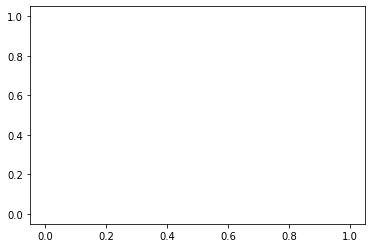

In [0]:
import matplotlib.pyplot as plt
plt.plot(Error_list)

In [0]:
import numpy as np

def step(x): return np.array(x>0, dtype=np.int)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [1]])

W_layer_1 = np.array([[ 5.43873189, -3.11375556 , 5.29522101],
    [-3.07384198 , 5.53159189 , 5.30037098]])
W_layer_2 = np.array([[-8.35124937],
    [-8.33291174],
    [11.69026761]])

layer_1_output = step(np.dot(X, W_layer_1))
layer_2_output = step(np.dot(layer_1_output, W_layer_2))

print("Input is")
print(X)
print("expected output is")
print(Y)
print("acutal output is")
print(layer_2_output)

Input is
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
expected output is
[[0]
 [1]
 [1]
 [1]]
acutal output is
[[0]
 [1]
 [1]
 [0]]


In [0]:
class AddLayer:
    def __init__(self):
        pass

    def forward(self, x, y):
        out = x + y
        return out

    def backward(self, dout):
        dx = dout + 1
        dy = dout + 1
        return dx, dy

In [0]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y

        return out

    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x

        return dx, dy

In [0]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)
price = mul_tax_layer.forward(all_price, tax)


dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print("price:", int(price))
print("dApple:", dapple)
print("dApple_num:", int(dapple_num))
print("dOrange:", dorange)
print("dOrange_num:", int(dorange_num))
print("dTax:", dtax)

price: 715
dApple: 4.2
dApple_num: 210
dOrange: 6.300000000000001
dOrange_num: 315
dTax: 650


In [0]:
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out

        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx

In [0]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None

    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)

        return dx

In [0]:
class MSE:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None

    def forward(self, x, t):
        self.t = t
        self.y = x
        self.loss = 1 / 2 * np.square(self.t - self.y).sum()

        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size
        return dx

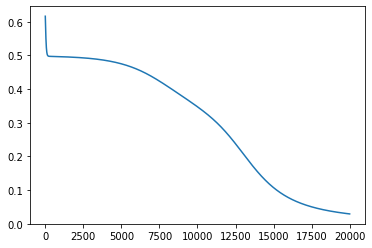

In [0]:
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size): 
      self.params = {}
      self.params['W1'] = np.random.uniform(size=(input_size, hidden_size))
      self.params['b1'] = np.zeros(hidden_size)
      self.params['W2'] = np.random.uniform(size=(hidden_size, output_size))
      self.params['b2'] = np.zeros(output_size)

      self.layers = OrderedDict()
      self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
      self.layers['Sigmoid1'] = Sigmoid()
      self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
      self.layers['Sigmoid2'] = Sigmoid()
      self.lastLayer = MSE()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x
 
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def gradient(self, x, t):
        self.loss(x, t)

        dout = 1
        dout = self.lastLayer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
 
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads


X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
t = np.array([[0], [1], [1], [0]])

network = TwoLayerNet(input_size=2, hidden_size=3, output_size=1)

epoch = 20000

learning_rate = 0.1

train_loss_list = []
for i in range(epoch):
    
    grad = network.gradient(X, t)

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(X, t)
    train_loss_list.append(loss)
plt.plot(train_loss_list)

In [0]:
import torch
import torch.utils.data
import torch.nn as nn
import torch.optim as optim

def weight_init(m):
    classname = m.__class__.__name__

    if classname.find('Linear') != -1:
        m.weight.data.uniform_(0.0, 1.0)
        m.bias.data.fill_(0)

class xor_dataloader(torch.utils.data.Dataset):
    
    def __init__(self):
        super().__init__()

        self.input = torch.Tensor([[0, 0], [0, 1], [1, 0], [1, 1]])
        self.target = torch.Tensor([[0], [1], [1], [0]])

    def __len__(self):
        
        return len(self.input)

    def __getitem__(self, item):

        X = self.input[item]
        t = self.target[item]
        return X, t


class TwoLayerNet_pytorch(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.network1 = nn.Sequential(
            nn.Linear(self.input_size, self.hidden_size),
            nn.Sigmoid(),
            nn.Linear(self.hidden_size, self.output_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        y = self.network1(x)
        return y


epochs = 20000
learning_rate = 0.1

net = TwoLayerNet_pytorch(input_size=2, hidden_size=3, output_size=1)
net.apply(weight_init)
optimizer = optim.SGD(net.parameters(), lr=learning_rate)
dataloader = torch.utils.data.DataLoader(xor_dataloader(), batch_size=4)

MSE = nn.MSELoss()

train_loss_list = []
for epoch in range(epochs):
    for i, (X, t) in enumerate(dataloader, 0):
        Y = net(X)
        loss = MSE(Y, t)

        train_loss_list.append(loss)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

print("Input is")
print(X)
print("expected output is")
print(t)
print("actual output is")
print(Y)
plt.plot(train_loss_list)

Input is
tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])
expected output is
tensor([[0.],
        [1.],
        [1.],
        [0.]])
actual output is
tensor([[0.0593],
        [0.9496],
        [0.9496],
        [0.0524]], grad_fn=<SigmoidBackward>)


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


[0/600][0/5] loss : 0.406515
[1/600][0/5] loss : 0.370110
[2/600][0/5] loss : 0.354091
[3/600][0/5] loss : 0.324692
[4/600][0/5] loss : 0.309452
[5/600][0/5] loss : 0.305472
[6/600][0/5] loss : 0.292895
[7/600][0/5] loss : 0.288430
[8/600][0/5] loss : 0.279757
[9/600][0/5] loss : 0.271886
[10/600][0/5] loss : 0.275884
[11/600][0/5] loss : 0.267259
[12/600][0/5] loss : 0.260379
[13/600][0/5] loss : 0.254238
[14/600][0/5] loss : 0.258886
[15/600][0/5] loss : 0.256509
[16/600][0/5] loss : 0.247527
[17/600][0/5] loss : 0.252225
[18/600][0/5] loss : 0.257103
[19/600][0/5] loss : 0.242596
[20/600][0/5] loss : 0.253094
[21/600][0/5] loss : 0.224702
[22/600][0/5] loss : 0.231823
[23/600][0/5] loss : 0.238052
[24/600][0/5] loss : 0.220369
[25/600][0/5] loss : 0.217815
[26/600][0/5] loss : 0.214717
[27/600][0/5] loss : 0.218378
[28/600][0/5] loss : 0.203382
[29/600][0/5] loss : 0.220072
[30/600][0/5] loss : 0.205203
[31/600][0/5] loss : 0.201273
[32/600][0/5] loss : 0.214729
[33/600][0/5] loss :

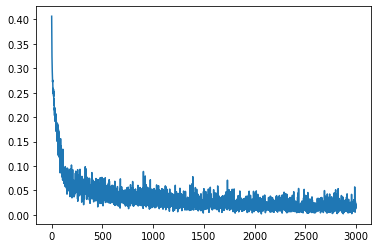

In [0]:
import torch
import torch.utils.data
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


def one_hot_embedding(labels, num_classes):
    y = torch.eye(num_classes)
    one_hot = y[labels]
    return one_hot

def softmax_to_one_hot(tensor):
    max_idx = torch.argmax(tensor, 1, keepdim=True)
    if tensor.is_cuda :
        one_hot = torch.zeros(tensor.shape).cuda()
    else:
        one_hot = torch.zeros(tensor.shape)
    one_hot.scatter_(1, max_idx, 1)
    return one_hot

def weight_init(m):
    classname = m.__class__.__name__
    if classname.find('Linear') != -1:
        m.weight.data.uniform_(0.0, 1.0)
        m.bias.data.fill_(0)


class TwoLayerNet_pytorch(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super().__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.output_size = output_size

    self.network1 = nn.Sequential(
        nn.Linear(self.input_size, self.hidden_size),
        nn.BatchNorm1d(self.hidden_size),
        nn.ReLU(),
        nn.Linear(self.hidden_size, self.output_size),
        nn.Softmax()
    )
  def forward(self, x):
    y = self.network1(x)
    return y

epochs = 5
learning_rate = 0.01
batch_size = 100
loss_function = nn.BCELoss()


train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor()
                       ,transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor()
                       ,transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=batch_size, shuffle=True)


net = TwoLayerNet_pytorch(input_size=784, hidden_size=50, output_size=10).cuda()
net.apply(weight_init)

optimizer = optim.Adam(net.parameters(), betas=(0.5, 0.999), lr=learning_rate)

train_loss_list = []
net.train()
for epoch in range(epochs):
    for i, (X, t) in enumerate(train_loader):
        X = X.view(-1, 784).cuda()
        t = one_hot_embedding(t, 10).cuda()

        Y = net(X)
        loss = loss_function(Y, t)
        train_loss_list.append(loss)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print("[%d/%d][%d/%d] loss : %f"%(i,len(train_loader),epoch,epochs, loss))

print("calculating accuracy...")
net.eval()
correct = 0
with torch.no_grad():
    for i, (X, t) in enumerate(test_loader):
        X = X.view(-1, 784).cuda()
        t = one_hot_embedding(t, 10).cuda()
        Y = net(X)

        onehot_y= softmax_to_one_hot(Y)
        correct += int(torch.sum(onehot_y * t))
print("Accuracy : %f" % (100. * correct / len(test_loader.dataset)))
plt.plot(train_loss_list)

In [0]:
import torch
import torch.utils.data
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt


def one_hot_embedding(labels, num_classes):
    # 단일 라벨 텐서를 원핫 벡터로 바꿔줍니다.
    y = torch.eye(num_classes)
    one_hot = y[labels]
    return one_hot

def softmax_to_one_hot(tensor):
    # softmax 결과를 가장 높은 값이 1이 되도록 하여 원핫 벡터로 바꿔줍니다. acuuracy 구할 때 씁니다.
    max_idx = torch.argmax(tensor, 1, keepdim=True)
    if tensor.is_cuda :
        one_hot = torch.zeros(tensor.shape).cuda()
    else:
        one_hot = torch.zeros(tensor.shape)
    one_hot.scatter_(1, max_idx, 1)
    return one_hot

def weight_init(m):
    classname = m.__class__.__name__
    # m에서 classname이 Linear(신경망 레이어)인 경우
    if classname.find('Linear') != -1:
        # weight를 uniform distribution을 이용하여 초기화하고 bias는 0으로 초기화
        m.weight.data.uniform_(0.0, 1.0)
        m.bias.data.fill_(0)


class TwoLayerNet_pytorch(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super().__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.output_size = output_size

    self.network1 = nn.Sequential(
        nn.Linear(self.input_size, self.hidden_size),
        nn.BatchNorm1d(self.hidden_size), # batch normalization 추가
        nn.ReLU(), # ReLU로 교체
        nn.Linear(self.hidden_size, self.output_size),
        nn.Softmax()
    )
  def forward(self, x):
    y = self.network1(x)
    return y

epochs = 5
learning_rate = 0.01
batch_size = 100
loss_function = nn.BCELoss()


In [0]:
from torch.utils.data.sampler import SubsetRandomSampler
# load the dataset
dataset = datasets.MNIST('../data', train=True,
                         download=True, transform=transforms.Compose([
        transforms.ToTensor()
        , transforms.Normalize((0.1307,), (0.3081,))
    ]))
num_train = len(dataset)
valid_size = 500

indices = list(range(num_train))
split = num_train-valid_size
np.random.shuffle(indices)
train_idx, valid_idx = indices[:split], indices[split:]
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = torch.utils.data.DataLoader(dataset,
                                           batch_size=batch_size, sampler=train_sampler)

valid_loader = torch.utils.data.DataLoader(dataset,
                                           batch_size=batch_size, sampler=valid_sampler)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor()
                       ,transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=batch_size, shuffle=True)

In [0]:
net = TwoLayerNet_pytorch(input_size=784, hidden_size=50, output_size=10).cuda() # gpu 사용.(뒤에 .cuda())
net.apply(weight_init)

optimizer = optim.Adam(net.parameters(), betas=(0.5, 0.999), lr=learning_rate)  # Adam optimizer로 변경. betas =(0.5, 0.999)

train_loss_list = []
val_loss_list = []
net.train()
for epoch in range(epochs):
    for i, (X, t) in enumerate(train_loader):
        X = X.view(-1, 784).cuda() # gpu 사용.(뒤에 .cuda())
        t = one_hot_embedding(t, 10).cuda() # gpu 사용.(뒤에 .cuda())

        Y = net(X)
        loss = loss_function(Y, t)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #validation loss 계산. 계산이 무거우니 몇백 iteration혹은 몇 epoch마다 한번 수행하는것이 적당합니다. 예제는 매 100 iteration마다 수행합니다.
        if i % 100 == 0: 
          with torch.no_grad():
              val_100_loss = []
              for (X, t) in valid_loader:
                X = X.view(-1, 784).cuda() # gpu 사용.(뒤에 .cuda())
                t = one_hot_embedding(t, 10).cuda() # gpu 사용.(뒤에 .cuda())
      
                Y = net(X)
                loss = loss_function(Y, t)
                val_100_loss.append(loss)
              
              # append loss
              train_loss_list.append(loss)
              val_loss_list.append(np.asarray(val_100_loss).sum()/len(valid_loader))
        print("[%d/%d][%d/%d] loss : %f"%(i,len(train_loader),epoch,epochs, loss))

print("calculating accuracy...")
net.eval()
correct = 0
with torch.no_grad():
    for i, (X, t) in enumerate(test_loader):
        X = X.view(-1, 784).cuda() # gpu 사용.(뒤에 .cuda())
        t = one_hot_embedding(t, 10).cuda() # gpu 사용.(뒤에 .cuda())
        Y = net(X)

        onehot_y= softmax_to_one_hot(Y)
        correct += int(torch.sum(onehot_y * t))
print("Accuracy : %f" % (100. * correct / len(test_loader.dataset)))
plt.plot(np.column_stack((train_loss_list,val_loss_list)))